### `Retail Store Sales` Anomaly Detection using ML Techniques 

This work is inspired by https://github.com/springboard-curriculum/mec-mini-projects/blob/master/mec-16.4.1-anomaly-detection-mini-project/Mini_Project_Anomaly_Detection.ipynb

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import git
import warnings
warnings.filterwarnings('ignore')

### 1. Load the data

In [16]:
base_path = git.Repo('.', search_parent_directories=True).working_tree_dir
data_path = base_path + '/data/Superstore.csv'

In [17]:
df = pd.read_csv(data_path)
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


### 2. Exploratory Data Analysis (EDA)

#### 2.1. Check for missing values

In [22]:
# Check if there is any missing value in the dataset
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


#### 2.2. Sales distribution

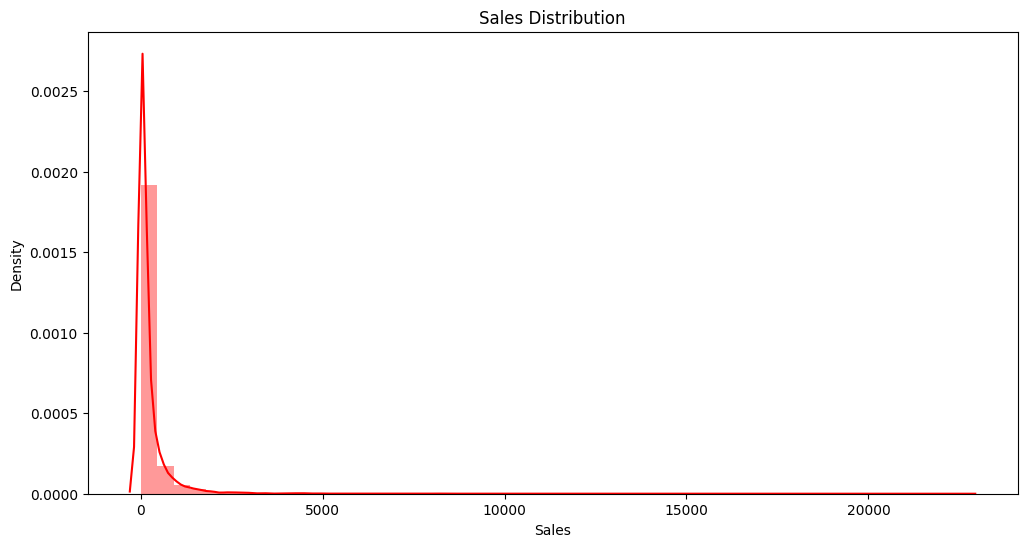

In [31]:
# Sales distribution
plt.figure(figsize=(12, 6))
sns.distplot(df['Sales'], color='r')
plt.title('Sales Distribution')
plt.show()

In [24]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

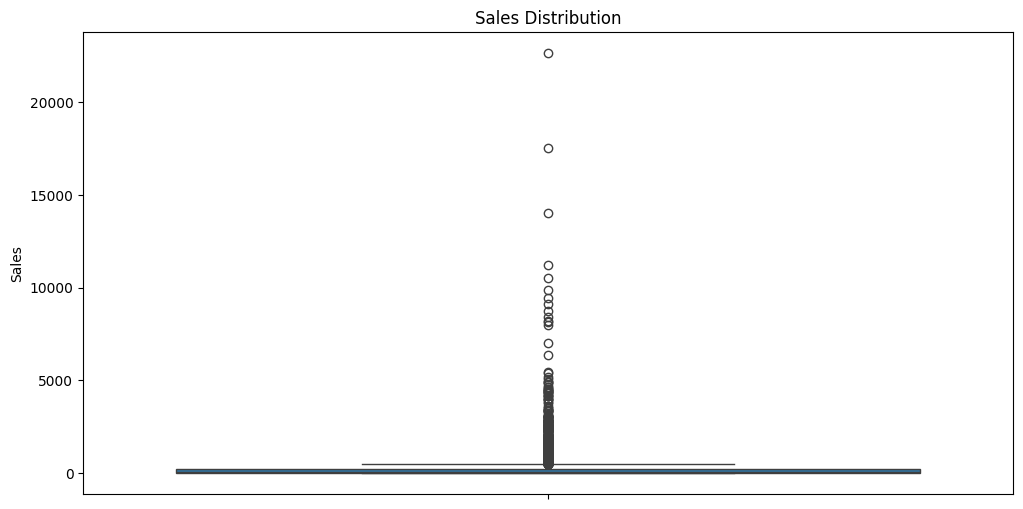

In [29]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(df['Sales'])
plt.title('Sales Distribution')
plt.show()

### 3. Univariate Anomaly Detection

Uni-variate anomaly detection is the simplest form of anomaly detection. It involves identifying outliers in a single variable. Methods:

    - Statistical Process Control (SPC) (mean+3*std threshold)
    - Isolation Forest

#### 3.1. Univariate Anomaly Detection on Sales using SPC

In [33]:
# Obtain upper limits for sales
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
three_std = 3 * std_sales   
upper_limit = mean_sales + three_std

print('Upper Limit:', upper_limit)

Upper Limit: 2099.593302356544


##### Visualize outlier region

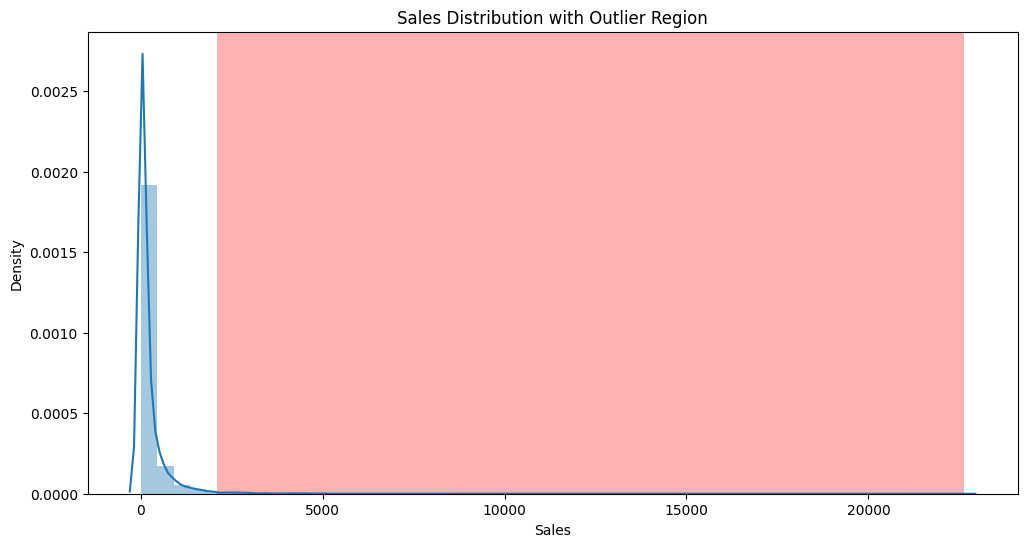

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.distplot(df['Sales'])
plt.axvspan(upper_limit, df['Sales'].max(), facecolor='r', alpha=0.3)
plt.title("Sales Distribution with Outlier Region");

##### Filter out outliers

In [39]:
df_outliers = df[df['Sales'] > upper_limit]
df_outliers.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920


#### 3.1. Univariate Anomaly Detection on Sales using Isoaltion Forest

Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. It explicitly isolates anomalies instead of profiling normal data points. Isolation Forest is based on the Decision Tree algorithm. It isolates anomalies by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [40]:
from sklearn.ensemble import IsolationForest

In [41]:
iforest = IsolationForest(
    n_estimators=100, contamination=0.01, random_state=42
)

iforest.fit(df['Sales'].values.reshape(-1, 1))

IsolationForest(contamination=0.01, random_state=42)

##### Visualize outlier region

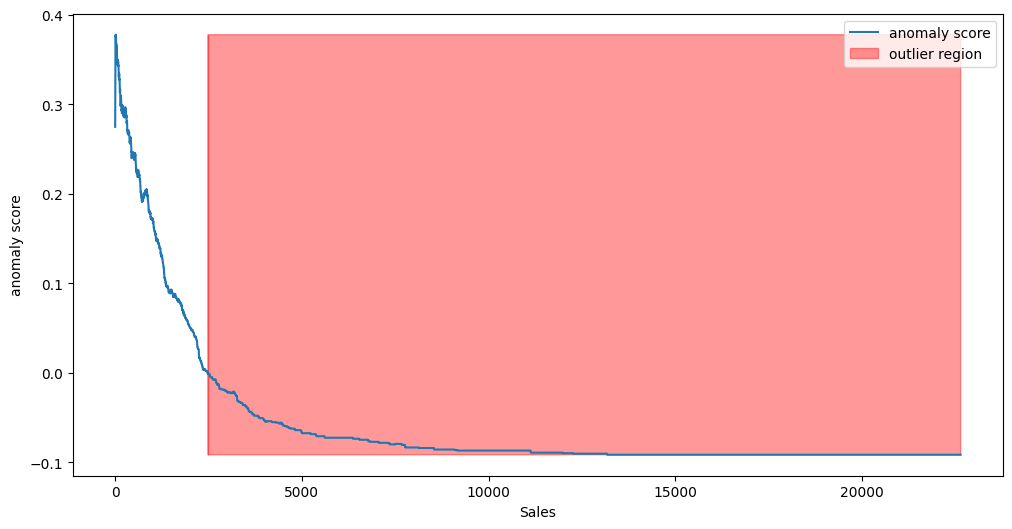

In [42]:
# Visualize the outlier region
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1, 1)
anomaly_score = iforest.decision_function(xx)
outlier = iforest.predict(xx)

plt.figure(figsize=(12, 6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r', alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show()